# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.patches as mpl_patches

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={cities[0]}"
print(url)


https://api.openweathermap.org/data/2.5/weather?appid=dedc1f7c307f1331fe6fdd08705845b9&units=metric&q=faya


In [16]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        request = requests.get(city_url)
        city_weather = request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | pangai
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kamaishi
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | liuzhou
Processing Record 12 of Set 1 | puerto escondido
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | damietta
Processing Record 16 of Set 1 | antalaha
Processing Record 17 of Set 1 | nokaneng
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | olafsvik
Processing Record 22 of Set 1 | mwense
Processing Record 23 of Set 1 | kapaa
Process

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,21.17,90,100,2.06,US,1680888967
1,pangai,-19.8000,-174.3500,25.06,94,20,1.03,TO,1680888997
2,vaini,-21.2000,-175.2000,25.09,100,75,2.06,TO,1680888997
3,kamaishi,39.2667,141.8833,11.45,92,100,1.42,JP,1680888998
4,khatanga,71.9667,102.5000,-20.42,97,100,6.01,RU,1680888998


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,21.17,90,100,2.06,US,1680888967
1,pangai,-19.8000,-174.3500,25.06,94,20,1.03,TO,1680888997
2,vaini,-21.2000,-175.2000,25.09,100,75,2.06,TO,1680888997
3,kamaishi,39.2667,141.8833,11.45,92,100,1.42,JP,1680888998
4,khatanga,71.9667,102.5000,-20.42,97,100,6.01,RU,1680888998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

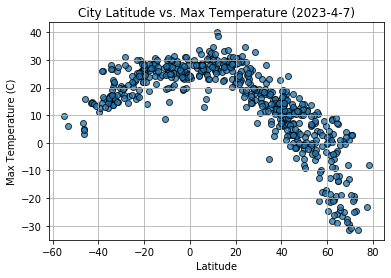

In [34]:
# Build scatter plot for latitude vs. temperature
lat_city = city_data_df["Lat"]
temp_city = city_data_df["Max Temp"]
plt.scatter(lat_city, temp_city, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-4-7)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

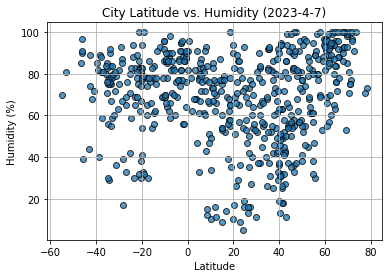

In [35]:
# Build the scatter plots for latitude vs. humidity
lat_city = city_data_df["Lat"]
hum_city = city_data_df["Humidity"]
plt.scatter(lat_city, hum_city, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-4-7)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

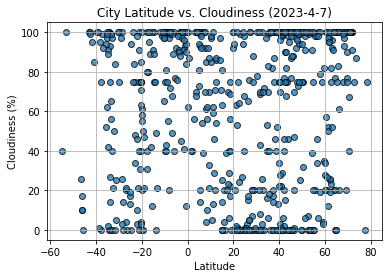

In [36]:
# Build the scatter plots for latitude vs. cloudiness
lat_city = city_data_df["Lat"]
cloud_city = city_data_df["Cloudiness"]
plt.scatter(lat_city, cloud_city, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-4-7)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

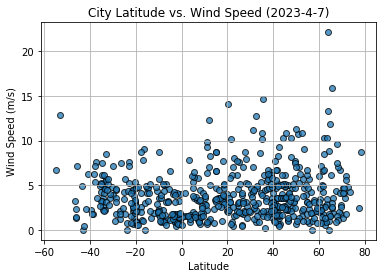

In [37]:
# Build the scatter plots for latitude vs. cloudiness
lat_city = city_data_df["Lat"]
wind_city = city_data_df["Wind Speed"]
plt.scatter(lat_city, wind_city, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-4-7)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def linearRegressionPlot(x_values, y_values):
    # Use linear regression and grab all values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Create the values for the regression line
    regress_values = x_values * slope + intercept

    # Create formula of the line to display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter
    plt.scatter(x_values,y_values)
    # Plot the linear regression line
    plt.plot(x_values,regress_values,"r-") # red & solid line style

    # Add equation to plot to best location using legend workaround
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)]
    labels = [line_eq]
    leg = plt.legend(handles, labels, loc='best', fontsize='xx-large', fancybox=True, framealpha=0.0, handlelength=0, handletextpad=0)
    leg.get_texts()[0].set_color("red")

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)

    # Print r-value
    print(f"The r-value is: {rvalue}")
    plt.show()

    return
    

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask_northern_hemi = (city_data_df["Lat"] >= 0)
northern_hemi_df = city_data_df.loc[mask_northern_hemi,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,21.17,90,100,2.06,US,1680888967
3,kamaishi,39.2667,141.8833,11.45,92,100,1.42,JP,1680888998
4,khatanga,71.9667,102.5000,-20.42,97,100,6.01,RU,1680888998
5,longyearbyen,78.2186,15.6401,-8.09,73,75,8.75,SJ,1680888999
8,klaksvik,62.2266,-6.5890,8.51,87,25,8.52,FO,1680889000


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask_southern_hemi = (city_data_df["Lat"] < 0)
southern_hemi_df = city_data_df.loc[mask_southern_hemi,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pangai,-19.8000,-174.3500,25.06,94,20,1.03,TO,1680888997
2,vaini,-21.2000,-175.2000,25.09,100,75,2.06,TO,1680888997
6,hermanus,-34.4187,19.2345,14.33,79,100,2.72,ZA,1680888999
7,ushuaia,-54.8000,-68.3000,9.79,70,40,6.69,AR,1680888979
9,esperance,-33.8667,121.9000,15.21,76,93,4.88,AU,1680889000


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8672181093554197


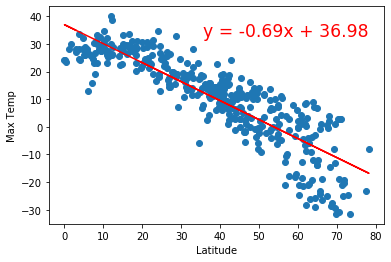

In [61]:
# Linear regression on Northern Hemisphere
linearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.6666248346523166


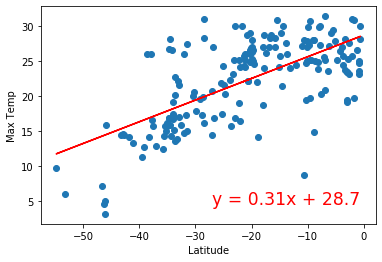

In [62]:
# Linear regression on Southern Hemisphere
linearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** <br>
The northern hemisphere latitude has a strong negative correlation (-0.86 r-value) with temperature. The southern hemisphere latitude has a moderate positive correlation (0.66 r-value) with temperature. This means that as we move towards the equator (as latitude gets closer to 0), temperature is more likely to increase. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.30133249986533595


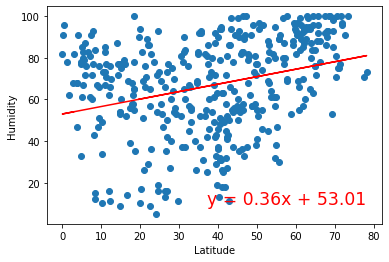

In [63]:
# Northern Hemisphere
linearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: 0.1613523552231003


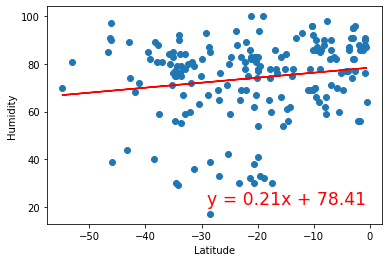

In [64]:
# Southern Hemisphere
linearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:**<br>
The nothern hemisphere latitude has a weak positive correlation (0.3 r-value) to humidity. The southern hemisphere latitude has very weak positive correlation (0.16 r-value) to humidity. This means that latitude has little to no effects on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12263676462498432


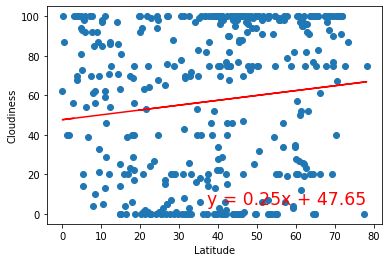

In [65]:
# Northern Hemisphere
linearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.2770497896045251


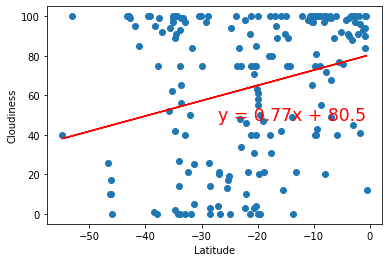

In [66]:
# Southern Hemisphere
linearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** <br>
The nothern hemisphere latitude has very weak positive correlation (0.12 r-value) to cloudiness. The southern hemisphere latitude has very weak positive correlation (0.27 r-value) to cloudiness. This means that latitude has little to no effects on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07813200327907015


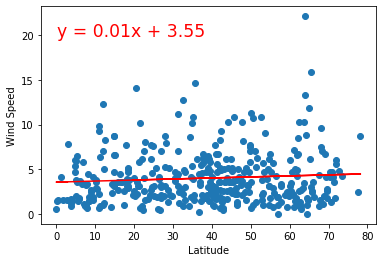

In [67]:
# Northern Hemisphere
linearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.3235359781719096


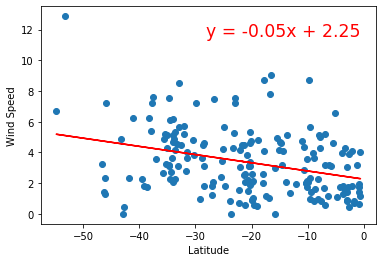

In [68]:
# Southern Hemisphere
linearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** <br>
The nothern hemisphere latitude has very weak positive correlation (0.078 r-value) to wind speed. The southern hemisphere latitude has weak negative correlation (-0.32 r-value) to wind speed. This means that latitude has little to no effects on wind speed.